In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

In [ ]:
df=pd.read_csv('/GDP_CAT.csv')

In [ ]:
# Let's start of years from 2000

df = df.iloc[::-1]

In [ ]:
df = df.set_index('Year') # YEARS as our index

In [ ]:
df

,GDP,Domestic demand,Consumer expenditure household,Consumer public adm,Gross capital,Equip. Goods others,Const.,Ext. Balance,Foreign balance,Total exports goods and services,Exports goods and services,Foreign consump. Territory,Total imports goods and services,Imports goods and services,National residents consump. Abroad
Year,,,,,,,,,,,,,,,
2000,127839,117567,69916,15832,31820,14372,16329,10271,-5874,43650,37382,6268,49523,48228,1295
2001,137165,126110,74692,17131,34287,14924,18356,11055,-3595,47344,40743,6601,50940,49446,1494
2002,145813,135065,79584,18575,36906,15388,20361,10748,-2923,48685,41665,7020,51608,50189,1419
2003,156600,145578,84675,20262,40640,16702,22773,11022,-4473,48795,41735,7060,53268,51702,1566
2004,169776,158942,91997,22367,44578,18015,25326,10835,-7911,50971,43430,7541,58883,57050,1833
2005,183507,173189,99316,24441,49433,20041,28678,10318,-9486,55214,47192,8023,64700,62449,2251
2006,199169,190410,107097,26821,56492,22621,32668,8759,-9936,60811,52405,8407,70747,68286,2461
2007,212391,205664,114653,29674,61338,25658,34499,6726,-10972,64427,55734,8693,75399,72723,2676
2008,216922,209685,117445,32709,59531,25736,32901,7237,-6303,65416,56704,8712,71719,69169,2550


### Exports: Approach for pulling out of the recession.

Accounting for roughly 25% of total Spanish exports, Catalonia has traditionally been Spain's exporting powerhouse. The Spanish government has been very adamant with the claim that the private sector competitivity gains (thanks to the profit-led strategy) have increased Spain's exports and pulled the country out of the recession.

**Macroeconomic strategy approach: Profit-led**

Companies gaining competitivity thanks to labor costs reductions - with a strong adjustment of salaries and labor income. Although this approach has brought Catalan, and for an extension, Spanish exports to record numbers, and also has spurred capital investment thanks to higher corporate profits, the impact and social effects of the crisis have lasted longer in Spain than in most OECD economies.

Many theorists argue that a  **Wage-led growth strategy**  with the prioritization of the stimulation of the GDP via private internal demand, **private consumption expenditures** would have been a most optimal strategy for the economic recovery than an export-oriented recovery via lower wages and labour income devaluation, which limited the expansion of the private consumption expenditures. As the professor of economics Engelbert Stockhammer (Kingston University, UK) defends, however, in order to have a balanced Wage-led growth strategy, higher labor incomes have to be aligned with human-capital marginal productivity gains.

Now, let's examine the evolution of the ratio of total exports of goods and service with the overall GDP :

Text(0.5, 1.0, 'Total exports of goods and services as a ratio of the overall GDP (2000-2016)')

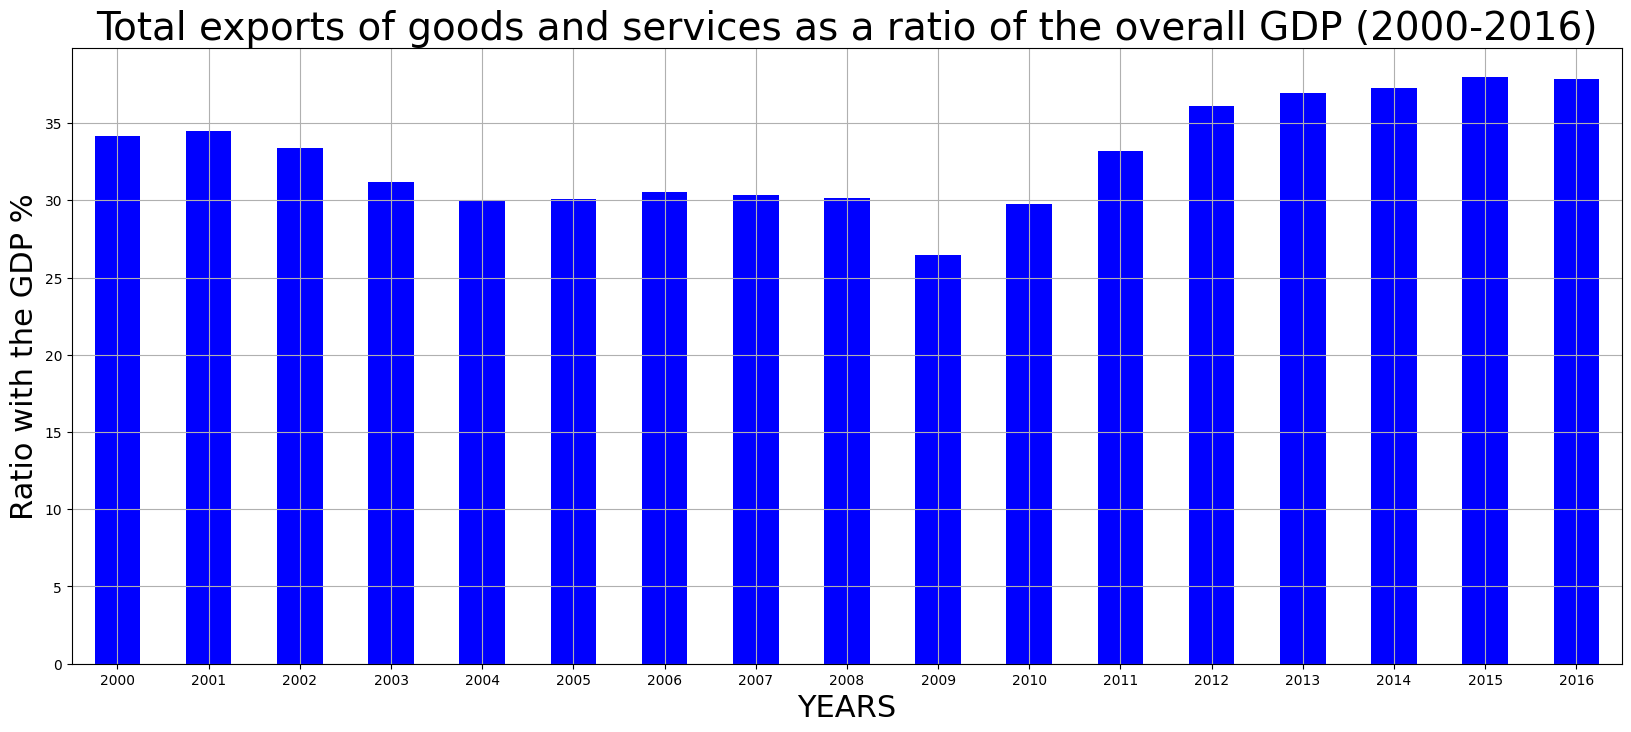

In [ ]:
# We create a new series called Exports_per_GDP
Exports_per_GDP=df['Total exports goods and services']/df.GDP*100
Exports_per_GDP.plot(figsize=(20,8), kind='bar', use_index=True, grid=True, color='b')
SIZE = 20
plt.rc('xtick', labelsize=SIZE)                     # fontsize of the tick X labels
plt.rc('ytick', labelsize=SIZE)                     # fontsize of the tick Y labels
plt.xticks(rotation=0)

plt.xlabel('YEARS', size=22)                        # x title label
plt.ylabel('Ratio with the GDP %', size=22)         # y title label
plt.title('Total exports of goods and services as a ratio of the overall GDP (2000-2016)',
          size=28)                                  # plot title label

We see that at 2009, when the recession hit the hardest, te Exports vs GDP ratio was by far the lowest in the series.

Using a Hexbin correlation plot we can examine the relationship between the GDP ratio for construction and the GDP ratio for Exports :

### HeatMap: correlation of our Macroeconomic indicators

We can create a HeatMap to have a general overview of the correlations of our indicators with each other.

<Axes: title={'center': 'Pearson Correlation'}>

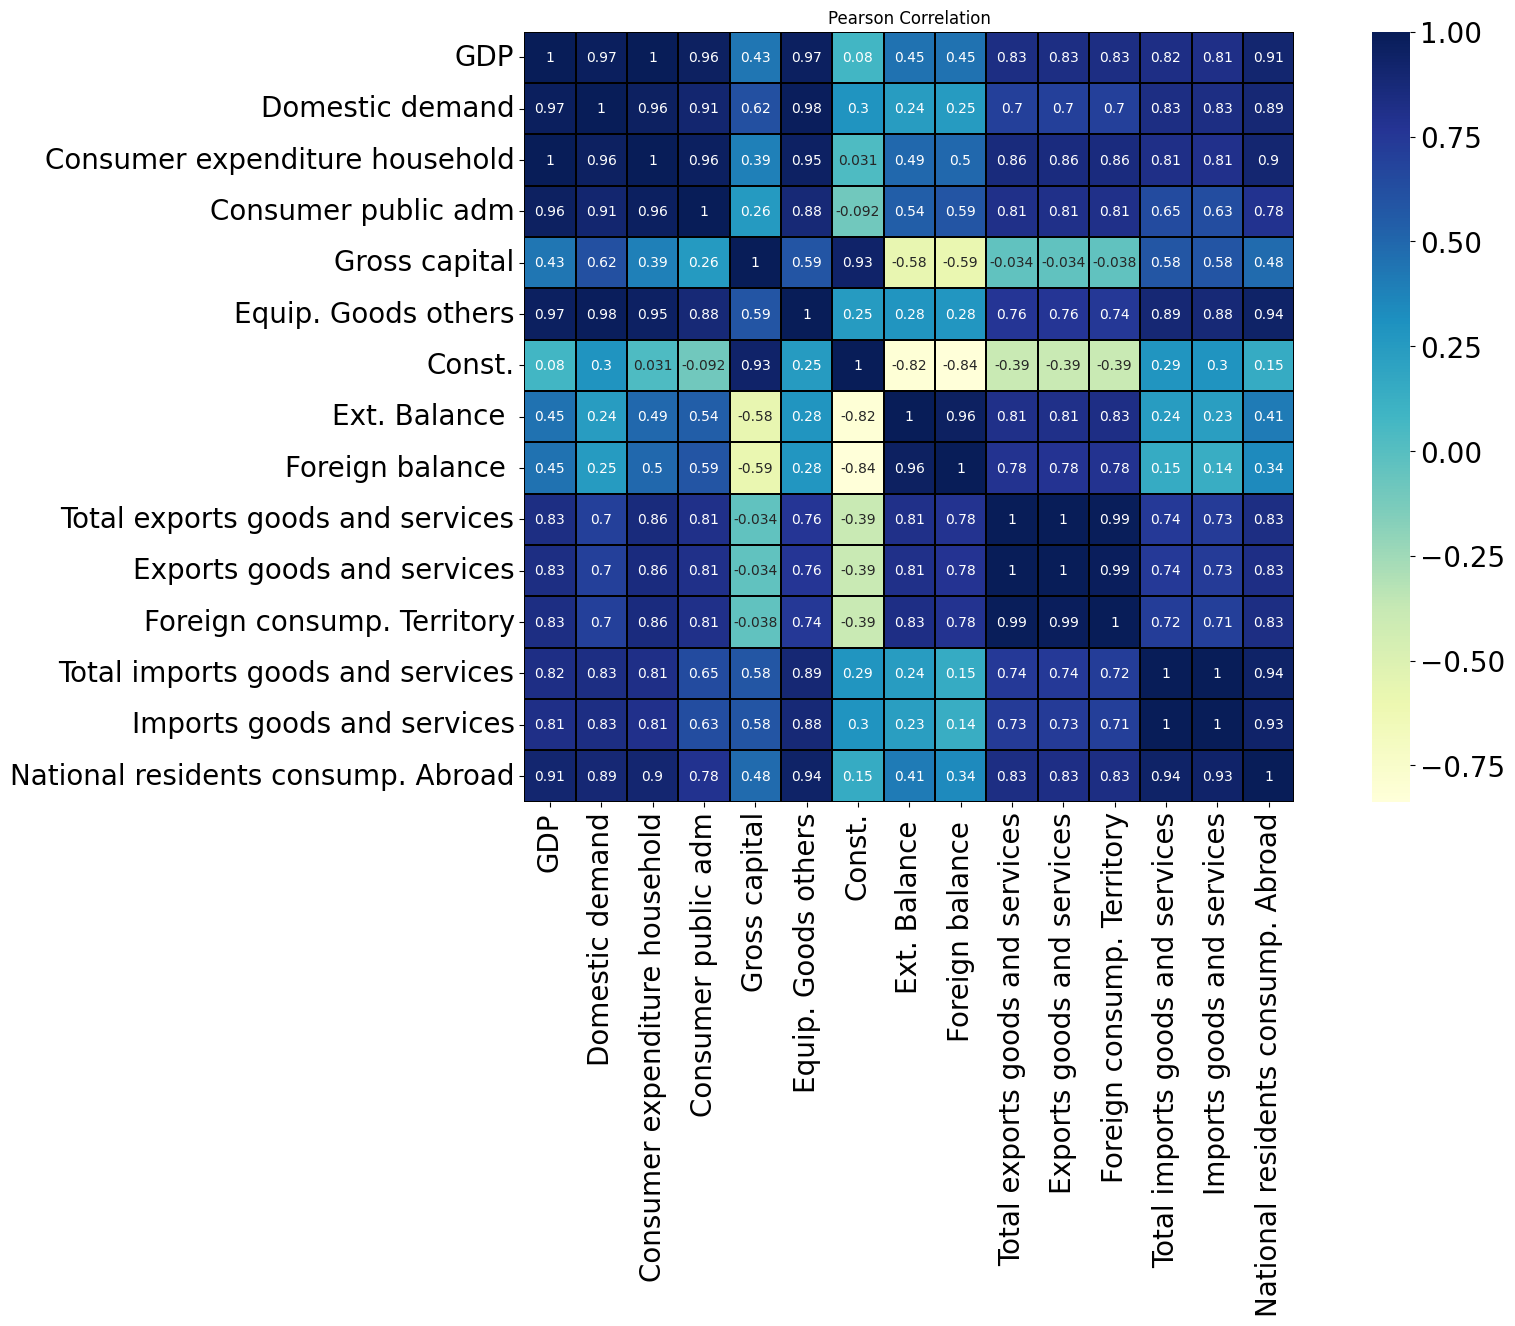

In [ ]:
# We set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

plt.title('Pearson Correlation')

# We draw the heatmap using seaborn
sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu",linecolor='black', annot=True)

As expected, given the darker shade of the colors, we see many features with positive linear correlations amongst each other. Others like construction or construction ratio with the GDP have a negative correlation with many indicators like the Foreign balance account, exterior balance or Exports ratio per GDP.

### Regression analysis using the least square method


We will make a regression model using 6 regressors :

    Consumer expenditure = C
    Consumer public adm = PC
    Equipments of goods and others (capital investment without construction) = Inv
    Constuction = Con
    Total exports goods and services = E
    Total imports goods and services = Imp



**Consumer expenditure** is the amount of final consumption made by resident households to meet their everyday needs. In most developed economies it accounts for around 60% of the gross domestic product (GDP).Therefore, it is an essential variable for determnining the GDP output.

The government component of the GDP (Concumer public adm) accounts for the all **government expenditure.**

Economists pay special attention to **capital investment** because of the role they play in improving the productive capacity of a country. In other words, capital investment makes it possible to produce at a higher level of efficiency thanks to an increase of marginal productivity.

**Total exports** account the amount by which foreigners spend on a home country's goods and services.

**Imports** represent domestic purchases of foreign-produced goods and services. So, they are deducted from the calculation of GDP.

**Construction** represents private housing purchases (or residential investment).

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

We will use these macroeconomic indicators as regressors :

In [ ]:
X=['Consumer expenditure household','Consumer public adm','Equip. Goods others','Const.',
   'Total exports goods and services','Total imports goods and services']

In [ ]:
# We create our matrix of regressors (independent variables)
X=df[X]

# We create our dependant variable
y=df.GDP

In [ ]:
# We create a linear regression object
lm = LinearRegression()

In [ ]:
# We fit our model
lm.fit(X,y)

LinearRegression()

In [ ]:
# From the stats models we built our linear model.
model=lm.fit(X,y)

result = sm.ols(formula="y ~ X", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     967.0
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           3.16e-13
Time:                        07:26:21   Log-Likelihood:                -145.14
No. Observations:                  17   AIC:                             304.3
Df Residuals:                      10   BIC:                             310.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3732.3693   5345.222      0.698      0.5

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


### Statistical tests:  Accuracy of the regression model


* The model presents very high values of the R-squared: 0.998 and Adj.R-squared: 0.997, which means that our regressors explain a 99.8% of the overall variability of the dependent variable.


* After applying the F - statistic test, we can safely say that the model is statistically significant and valid as it shows a significance level P (F-statistic), much lower than 5%. 3.16e-13


* Checking the intercept value and each individual regressor p-value, working at a confidence interval of 5%, only 'Consumer expenditure household' = C is statistically significant.


* Near multicollinearity often occurs in reality (when our regressors are highly correlated).In this case, we can estimate the regression coefficients, however, we get high standard errors and hence the estimated regression coefficients are not completely accurate. Some of our regressors are highly correlated to one another (see the HeatMap).


### Line of best fits

We build the line of best fits with the GDP predicted by our model and the actual GDP. We see a strong alignment.

In [ ]:
p=lm.predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


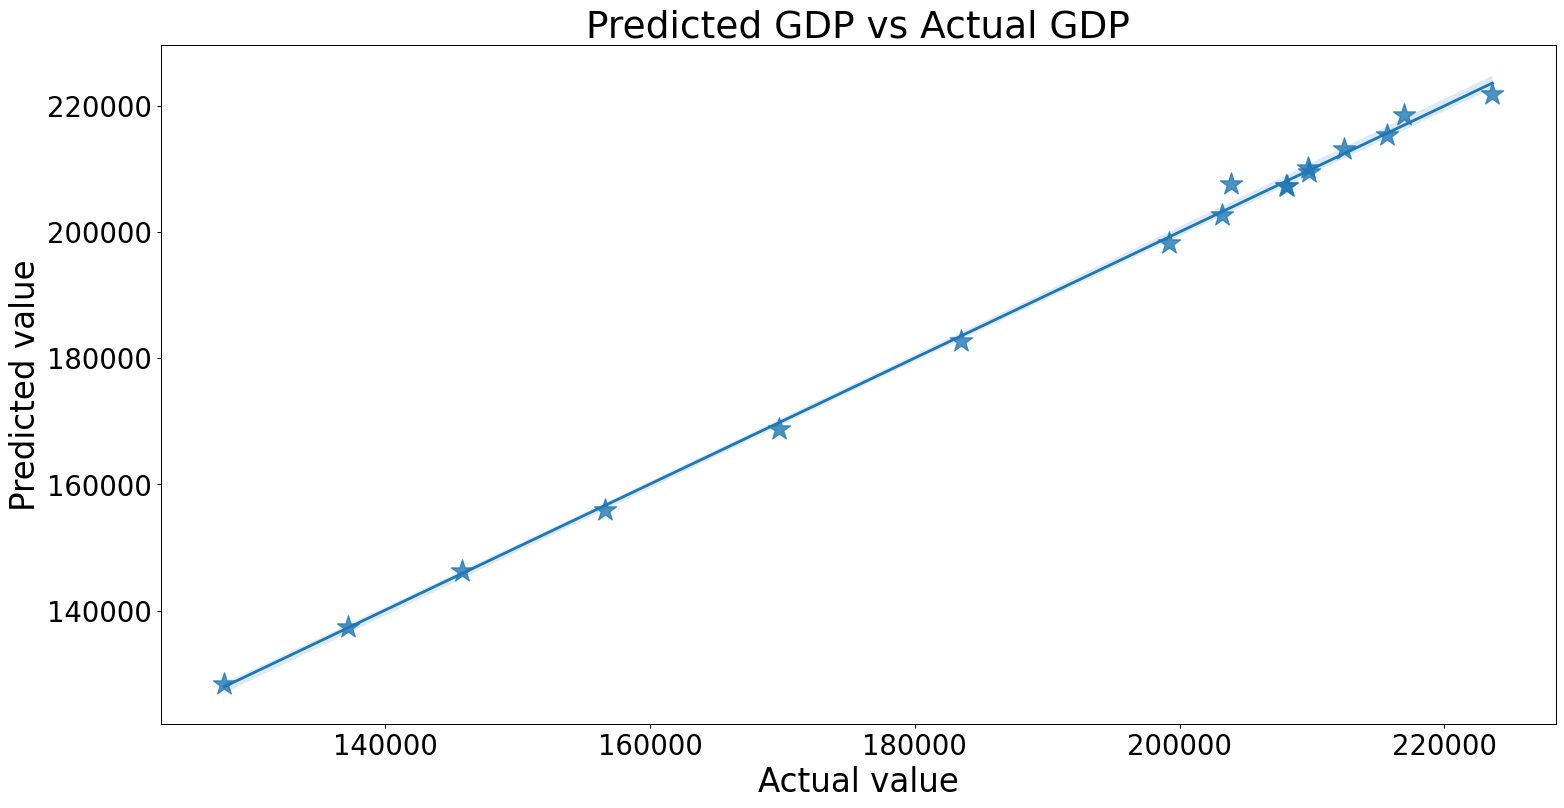

In [ ]:
plt.figure(num=3, figsize=(20, 10), dpi=90, facecolor='w', edgecolor='aqua')

sns.regplot(y, p, data=df, marker='*', scatter_kws={"s": 350})

SIZE2=20
plt.rc('xtick', labelsize=SIZE2)    # fontsize of the tick X labels
plt.rc('ytick', labelsize=SIZE2)    # fontsize of the tick Y labels


plt.title('Predicted GDP vs Actual GDP', size=30)
plt.xlabel('Actual value', size=26)
plt.ylabel('Predicted value', size=26)
plt.show()

Let's check our errors :

In [ ]:
Errors=(y-p)

print(Errors)

Year
2000    -573.738014
2001    -288.212431
2002    -532.891502
2003     579.331983
2004    1033.845981
2005     837.314052
2006     919.990302
2007    -814.214971
2008   -1643.718537
2009     924.554736
2010     374.879262
2011    -416.016853
2012   -3705.228346
2013     475.455106
2014     811.611579
2015     265.037244
2016    1752.000410
Name: GDP, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print ('Fit a model X_train, and calculate MSE with y_train:', np.mean((y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with x_test, Y_test:', np.mean((y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with y_train: 2361320.802625307
Fit a model X_train, and calculate MSE with x_test, Y_test: 782665.4954817434


In [ ]:
y_train - lm.predict(X_train)

Year
2002    -532.891502
2012   -3705.228346
2015     265.037244
2008   -1643.718537
2001    -288.212431
2005     837.314052
2007    -814.214971
2014     811.611579
Name: GDP, dtype: float64

In [ ]:
y_test - lm.predict(X_test)

Year
2010     374.879262
2003     579.331983
2009     924.554736
2004    1033.845981
2000    -573.738014
2013     475.455106
2006     919.990302
2016    1752.000410
2011    -416.016853
Name: GDP, dtype: float64

As the observations for our model are so limited (only a series of 17 years) an outlier has a huge impact in our model's prediction capacity. Having only 17 observation is a huge drawback for model-building.